# Upper Confidence Bound (UCB)

In this exercise, we will be experimenting with the Multi-armed bandit problem with the Upper Confidence Bound (UCB) algorithm described in chapter 8 in the textbook (UCB asymptotic optimality).

## Setup

Consider an unstructured bandit problem. Suppose that we have $k$ arms, each with a random reward at time $t$ given by $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t]$ is drawn from an i.i.d. standard Gaussian distribution. Note that we only require $\epsilon[t]$ to be sub-Gaussian for the analysis to go through.

The following code should be implemented to capture this setup.

# Reward function
Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg', return $k$- dimensional vector 'rew' such that $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t] \sim \mathcal{N}(0,I)$ where $I$ is the identity matrix of size $k \times k$.

In [ ]:
def get_reward(avg):

    reward = avg + np.random.normal(loc=0, scale=1, size=len(avg))
    
    return reward

## Algorithm review


Recall that there is only one parameter of interest in the UCB algoritm that is $k$ which is the number of arms. Please refer to the lecture notes and the textbook for details (Check algorithm 6 on page 116). The algorithm is as follows:

1. First choose each arm once.
2. Subsequently, choose the arm with the highest upper confidence bound.
3. Observe the reward and update the upper confidence bounds and repeat.

## Goal of this exercise

Implement the following using the template provided below. Please use the variable names suggested in the comments.

1. Basic UCB algorithm implementation
2. Plot the expected cumulative regret of the UCB algorithm as a function of time.
3. The cumulative regret is expected to be logarithmic against the horizon. To check that this is case, plot the logarithm of the expected cumulative regret of the UCB algorithm. (Hint: use the semilogx function in matplotlib.pyplot) 

# Import Dependencies

In [ ]:
import numpy as np
import pickle

## UCB

In [ ]:
class UCB(object):
    def __init__(self, avg):## Initialization
        
        self.means = avg
        self.num_arms = avg.size        
        self.best_arm = np.argmax(self.means)
        self.restart()

        return None
        ## variable names (most are self explanatory)
        ## self.num_arms is the number of arms (k)
        ## self.means[arm] is the vector of true means of the arms
        ## self.time is the current time index (this is t in the description at the top of this page)
        ## self.best_arm is the best arm given the true mean rewards
        ## self.cum_regret is the cumulative regret
        ## self.emp_means[arm] is the vector of empirical means of arms
        ## self.num_pulls[arm] is the vector of number of times that arm k has been pulled
        ## self.ucb_arr[arm] is the vector containing the upper confidence bounds

    def restart(self): ## Restart the algorithm: Reset the time index to zero and the upper confidence values to high values (done),
                       ## Set the values of the empirical means, number of pulls, and cumulative regret vector to zero.
        self.time = 0.0
        self.ucb_arr = 1e5*np.ones(self.num_arms)
        self.emp_means = np.zeros(self.num_arms)
        self.num_pulls = np.zeros(self.num_arms)
        self.cum_regret = [0]
        
        ## Your code here

        return None
    
    def get_best_arm(self): ## For each time index, find the best arm according to UCB
        
        ## Your code here
        best_arm = np.argmax(self.emp_means + self.ucb_arr)
        return best_arm
    
    def update_stats(self, arm, rew): ## Update the empirical means, the number of pulls, and increment the time index

        # Update Empirical Means First        
        self.emp_means[arm] = (self.emp_means[arm]*self.num_pulls[arm] + rew) / (self.num_pulls[arm] + 1)
        
        # Then increase the indices
        self.num_pulls[arm] += 1
        self.time += 1

        return None
    
    def update_ucb(self): ## Update the vector of upper confidence bounds
        
        ## Your code here
        f_t = 1 + (self.time*(np.log(self.time))**2)
        action = np.sqrt((2*np.log(f_t))/self.num_pulls) 
        self.ucb_arr = action 

        return None
    
    def update_reg(self, rew_vec, arm): ## Update the cumulative regret vector
    #regret = best - current arm 
    # Best means True. 
        
        ## Your code here
        self.cum_regret.append(self.cum_regret[-1] + (rew_vec[self.best_arm] - rew_vec[arm]))

        return None
    
    def iterate(self, rew_vec):  ## Iterate the algorithm
        
        ## Your code here
        arm = self.get_best_arm()
        rew = rew_vec[arm]

        self.update_stats(arm, rew)
        self.update_ucb()
        self.update_reg(rew_vec, arm)

        return None

# Experiment Function

The following code runs the UCB algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time at which we stop.

In [ ]:
def run_algo(avg, num_iter, num_inst):
    
    reg = np.zeros((num_inst, num_iter))
    
    algo = UCB(avg)
    
    
    for k in range(num_inst):
        algo.restart()
        
        if (k+1)%10 == 0:
            print('Instance number = ', k+1)
        
        for t in range(num_iter-1):
            rew_vec = get_reward(avg)
            
            algo.iterate(rew_vec)
            
        reg[k,:] = np.asarray(algo.cum_regret)
        
    return reg

# Initializations
Use the following to initialize your algorithm. The value of $k$ is implicitly set to $6$ in the initialization below. (This vector contains the actual mean rewards).

In [ ]:
avg = np.asarray([0.8, 0.96,0.7,0.5, 0.4, 0.3])
num_iter,num_inst = int(5e4),30

# Run Experiment



In [ ]:
reg = run_algo(avg, num_iter, num_inst)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide


Instance number =  10
Instance number =  20
Instance number =  30


## Plotting the Results

1. Compute the average regret over the number of instances and plot it against the number of iterations. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with UCB'.

2. Use the semilogx function in matplotlib to check that the regret is logarithmic against horizon.

Text(0.5, 1.0, 'Cumfulative Regret with UCB')

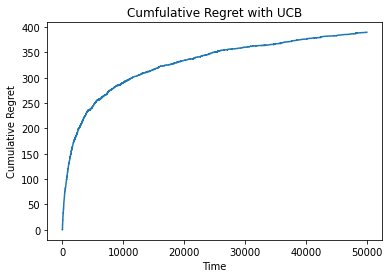

In [ ]:
import matplotlib.pyplot as plt

## Your code here
reg_lst = [reg_sublst[-1] for reg_sublst in reg]
avgreg_lst = np.mean(reg, 0)

plt.plot(avgreg_lst)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumfulative Regret with UCB')

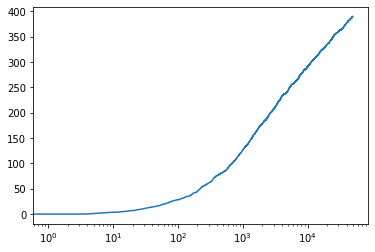

In [ ]:
plt.semilogx(avgreg_lst)